The Kmeans algorithm is used here to provide a item-based recommendation system.

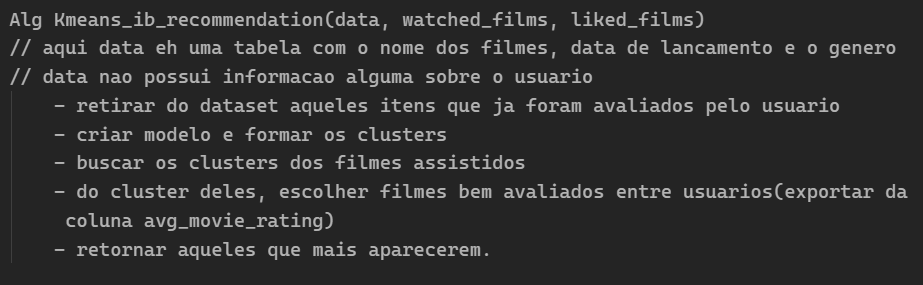

In [23]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.cluster import KMeans

In [24]:
def item_based_kmeans(item_characteristics: pd.DataFrame, items_columns, rated_items, liked_items, number_recommendation = 10, avg_rating_column:str = 'Movie Average Rating'):
    
    """
    essa abordagem se utiliza das caracteristicas dos itens bem avaliados por um usuario para conseguir indicar itens bem avaliados entre
    aqueles que sao similares a estes.
    """

    # rated_items sao todos aqueles itens que o usuario ja avaliou, rated items pode ter so o nome
    # liked_items sao os n mais bem avaliados do usuario usuario, precisa conter a linha inteira para ter as caracteristicas sobre o item, somente o nome nao vai ser suficiente

    removed_items = []

    for item in items_columns:
        if item in rated_items:
            removed_items.append(item)
    
    aux_data = item_characteristics.select_dtypes(exclude = ['object'])
    aux_data.drop(columns = removed_items, inplace = True)
    model = KMeans()
    model.fit(aux_data)
    aux_data['clusters'] = model.predict(aux_data)

    rec_items = []
    movies_names = item_characteristics['Movie Name']
    #pegar o cluster de cada um dos itens que o usuario gostou, dentre os desse cluster pegar aqueles com maior media (movie_average_rating da tabela de movie_ratings)
    for item in liked_items:
        #print(item)
        item = item_characteristics.loc[item_characteristics['Movie Name'] == item[1]]
        item = item.select_dtypes(exclude = ['object'])
        cluster = model.predict(item)
        #print(int(cluster))
        temp_data = aux_data.copy()
        temp_data = temp_data.loc[temp_data['clusters'] == int(cluster)]
        
        temp_data.sort_values(by = avg_rating_column, ascending= False, inplace= True)
        best = temp_data[avg_rating_column][0:number_recommendation*2]
        #temp_data['Movie Name'] = \

        #print(temp_data.head())
        correct_movies_names = movies_names.reindex(temp_data.index)
        temp_data['Movie Name'] = correct_movies_names
        #print(best)
        #print(type(best))
        best = temp_data['Movie Name'][0: number_recommendation*2]
        rec_items.append(best)
    
    #depois disso ja se tem os itens mais recomendados para cada item, agora eh fazer uma contagem e retornar aqueles que mais aparecem ou aqueles com a maior nota?
    #print(rec_items)
    rec_items = pd.concat(rec_items)
    #print(rec_items)
    counter = Counter(rec_items)
    final_rec = counter.most_common(number_recommendation)
    return [item for item, count in final_rec]
